cuda


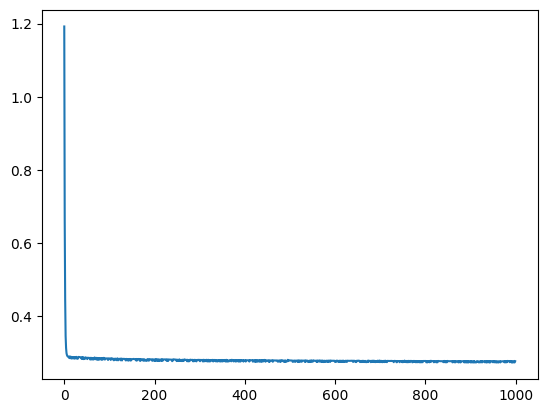

In [21]:
#question1
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class XORproblem(nn.Module):
    def __init__(self):
        super(XORproblem, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):  
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)

def criterion(model, train_data_loader, optimizer, loss_fn):
    total_loss = 0
    for data in train_data_loader:
        input, labels = data
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output.flatten(), labels) 
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_data_loader)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

loss_list = []
full_dataset = MyDataset(X, Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = XORproblem().to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)
epoch = 1000

for iter in range(epoch):
    model.train()
    avg_loss = criterion(model, train_data_loader, optimizer, loss_fn)
    loss_list.append(avg_loss)

plt.plot(loss_list)
plt.show()

cuda


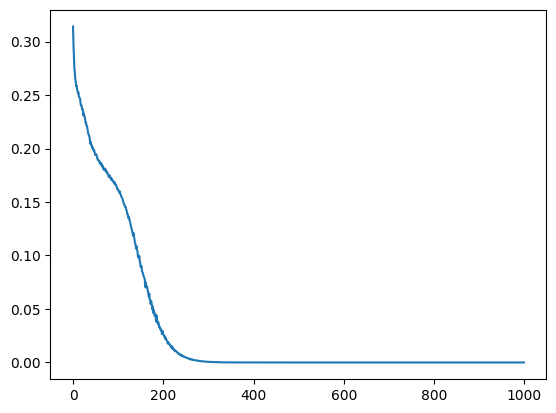

In [22]:
#question 2
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class XORproblem(nn.Module):
    def __init__(self):
        super(XORproblem, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):  
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)

def criterion(model, train_data_loader, optimizer, loss_fn):
    total_loss = 0
    for data in train_data_loader:
        input, labels = data
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output.flatten(), labels) 
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_data_loader)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

loss_list = []
full_dataset = MyDataset(X, Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = XORproblem().to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)
epoch = 1000

for iter in range(epoch):
    model.train()
    avg_loss = criterion(model, train_data_loader, optimizer, loss_fn)
    loss_list.append(avg_loss)

plt.plot(loss_list)
plt.show()

In [20]:
#question 3

weights1 = model.linear1.weight.data
bias1 = model.linear1.bias.data
weights2 = model.linear2.weight.data
bias2 = model.linear2.bias.data

print("Weights1 (Linear1):", weights1)
print("Bias1 (Linear1):", bias1)
print("Weights2 (Linear2):", weights2)
print("Bias2 (Linear2):", bias2)

X_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32).to(device)

linear1_output = torch.matmul(X_input, weights1.T) + bias1
sigmoid_output = torch.sigmoid(linear1_output)

final_output = torch.matmul(sigmoid_output, weights2.T) + bias2

print("Manual Output:", final_output)

Weights1 (Linear1): tensor([[ 0.1542,  0.1738],
        [-0.2054, -0.5587]], device='cuda:0')
Bias1 (Linear1): tensor([-0.5883, -0.0027], device='cuda:0')
Weights2 (Linear2): tensor([[-0.2161,  0.6024]], device='cuda:0')
Bias2 (Linear2): tensor([0.5006], device='cuda:0')
Manual Output: tensor([[0.7242],
        [0.6334],
        [0.6856],
        [0.5975]], device='cuda:0')


In [29]:
#question 4

import torch.optim as optim
from sklearn.metrics import confusion_matrix
from torchvision import datasets, transforms

class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128) 
        self.fc2 = nn.Linear(128, 64)   
        self.fc3 = nn.Linear(64, 10)     
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = self.relu(self.fc1(x))  
        x = self.relu(self.fc2(x))  
        x = self.fc3(x) 
        return self.softmax(x)  

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = FeedForwardNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)

print('Confusion Matrix')
print(conf_matrix)\

num_params = sum(p.numel() for p in model.parameters())
print(f"Total number of learnable parameters in the model: {num_params}")


Epoch [1/5], Loss: 1.6569
Epoch [2/5], Loss: 1.5498
Epoch [3/5], Loss: 1.5318
Epoch [4/5], Loss: 1.5210
Epoch [5/5], Loss: 1.5136
Confusion Matrix
[[ 965    0    5    2    0    3    3    1    1    0]
 [   0 1109   16    3    0    0    1    3    3    0]
 [   7    0 1006    1    5    1    4    4    4    0]
 [   0    0   42  929    1   16    1    8   11    2]
 [   1    3   13    0  925    0    8    3    3   26]
 [   9    1    8   10    2  838    7    1   11    5]
 [   9    2   28    0    4   10  900    0    5    0]
 [   3    4   32    2    6    0    0  965    3   13]
 [   4    4   26    8    4    4    4    6  913    1]
 [   7    6    3   10   17    8    2    9   14  933]]
Total number of learnable parameters in the model: 109386


In [27]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 42.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 8.9 MB/s eta 0:00:0000:0100:01m
